# Media Company Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Step 1 :

In [11]:
media = pd.read_csv("mediacompany.csv")
del media['Unnamed: 7']
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [13]:
# y/Target : Views_show

In [15]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,5/15/2017,313945,1808684,2226788,1398052759,1,0
76,5/16/2017,185689,1814227,2199844,1311961223,1,0
77,5/17/2017,142260,1755803,2225752,1248266254,1,0
78,5/18/2017,135871,1749654,2302789,1284859759,1,0
79,5/19/2017,108961,1746735,2279036,1246026846,1,0


In [18]:
# Step 2 :

In [20]:
media.shape

(80, 7)

In [22]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [24]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [26]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [28]:
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [30]:
# Datatype of date is incorrect!!

In [ ]:
# Step 3 : Data Cleaning!

In [32]:
# i) Missing Values : 
media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x14ada1ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x14ada3510>,
 'boxes': [<matplotlib.lines.Line2D at 0x14ada1450>],
 'medians': [<matplotlib.lines.Line2D at 0x14adb0810>],
 'fliers': [<matplotlib.lines.Line2D at 0x14adb1150>],
 'means': []}

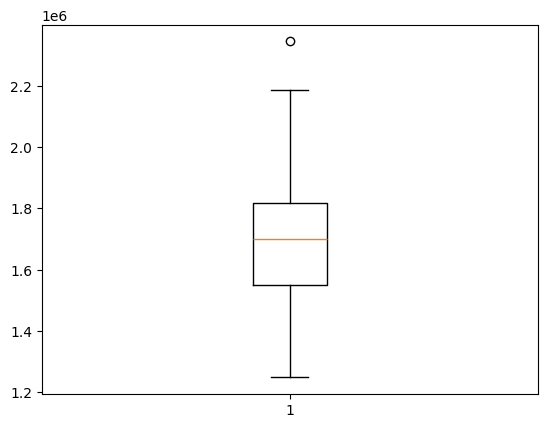

In [40]:
# ii) Outliers : 
plt.boxplot(media['Visitors'])

In [42]:
# Data Prep : 
media.dtypes
# Datatype of date is incorrect!!

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [44]:
media['Date'] = pd.to_datetime(media['Date'])

In [46]:
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [50]:
# 2 tasks : 
# 1) Create a new column to fetch day_of_week from the data
media['day_of_week'] = media['Date'].dt.dayofweek
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6
...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3


In [58]:
# 2) Create a new column which tells if the day was on weekday/weekend
media['week_part'] = media['Date'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

In [60]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week,week_part
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1
...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3,0


In [62]:
# Exploratory Data Analysis

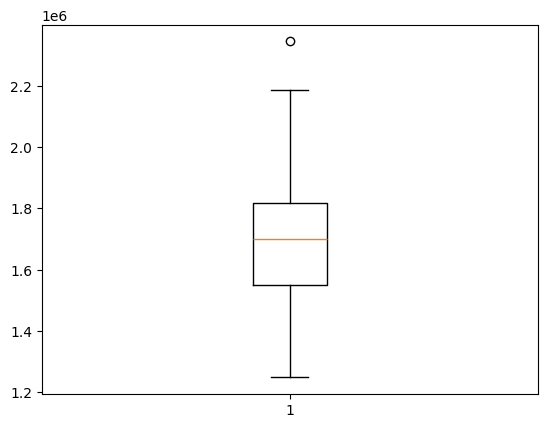

In [69]:
# 1) Uni
plt.boxplot(media['Visitors'])
plt.show()

<Axes: xlabel='Date'>

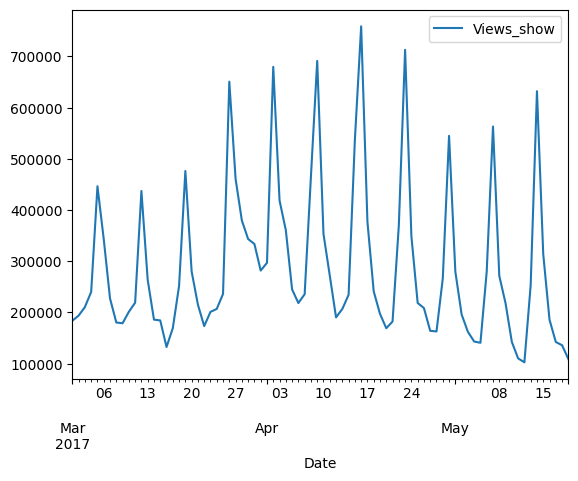

In [73]:
# 2) Bi
media.plot.line(x='Date',y='Views_show')
# therre's some pattern in the data!

<Axes: xlabel='day_of_week', ylabel='Views_show'>

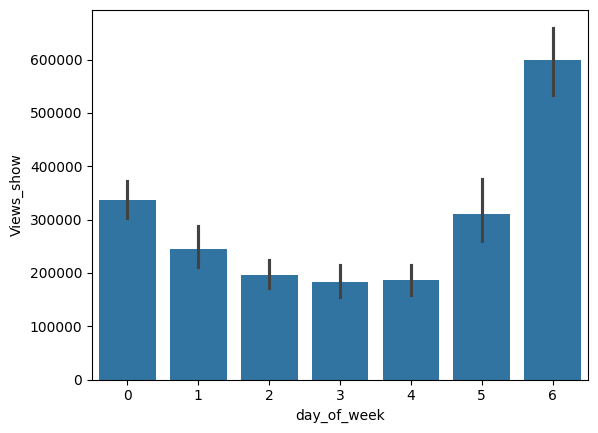

In [75]:
# Day of week
sns.barplot(data=media,x='day_of_week',y='Views_show')
# we can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.

<Axes: xlabel='week_part', ylabel='Views_show'>

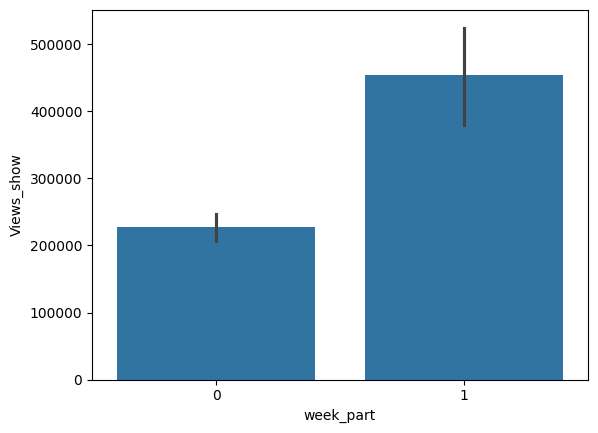

In [91]:
# EDA Tasks :
# 1) Views_show and weekend/weekday
sns.barplot(data=media,x='week_part',y='Views_show')
# viewership is higher on weekends.

<Axes: xlabel='Visitors', ylabel='Views_show'>

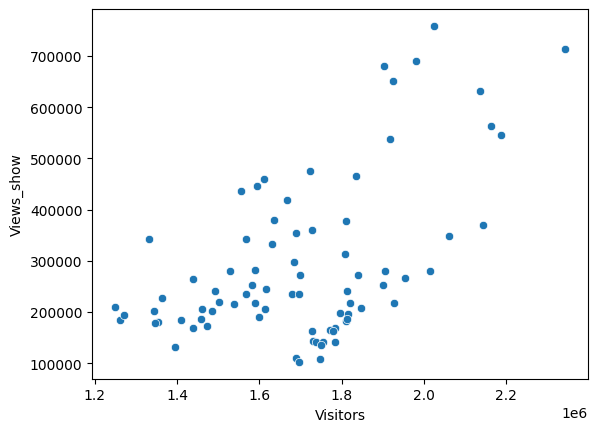

In [97]:
# 2) Scatter between Views_show & Visitors
sns.scatterplot(data = media, x = 'Visitors', y = 'Views_show')

<Axes: xlabel='Ad_impression', ylabel='Views_show'>

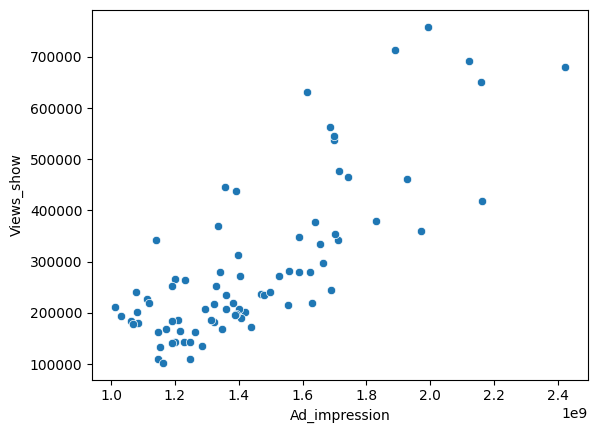

In [93]:
# 3) Scatter between Views_show & Ad_impression
sns.scatterplot(data = media, x = 'Ad_impression', y = 'Views_show')

<Axes: xlabel='Views_platform', ylabel='Views_show'>

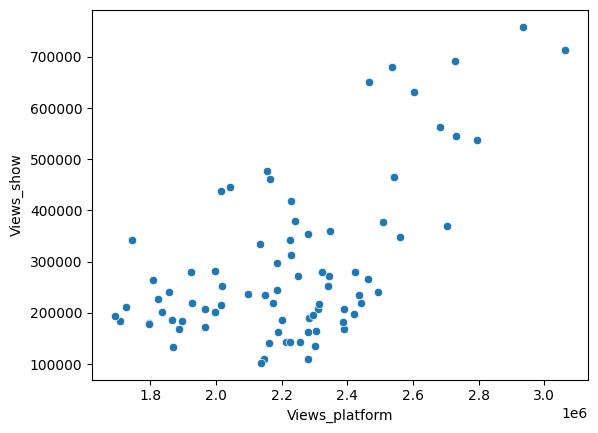

In [99]:
# 4) Scatter between Views_show & Views_platform
sns.scatterplot(data = media, x = 'Views_platform', y = 'Views_show')

In [101]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day_of_week', 'week_part'],
      dtype='object')

<Axes: xlabel='Cricket_match_india', ylabel='Views_show'>

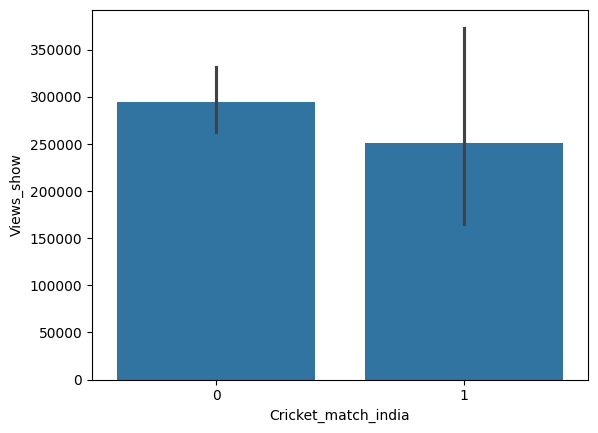

In [103]:
# 5) Views_show v/s CricketMatchIndia
sns.barplot(data=media,x='Cricket_match_india',y='Views_show')

In [105]:
# Show views slightly declines when there is a cricket match.

<Axes: xlabel='Character_A', ylabel='Views_show'>

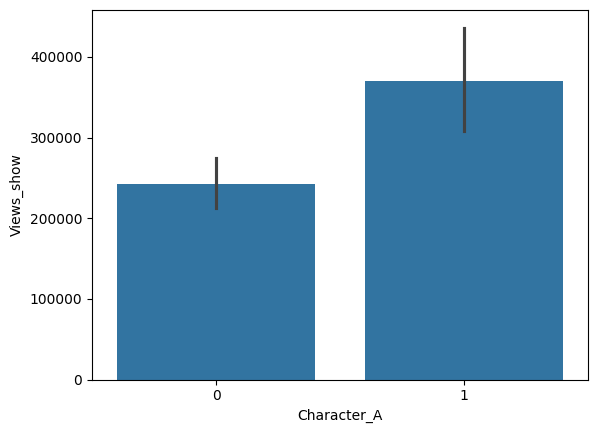

In [107]:
# 6) Views_show v/s Char_A
sns.barplot(data=media,x='Character_A',y='Views_show')

In [109]:
# Presence of Character A improves the show viewership.

In [115]:
# 7) Find corr on all numerical columns
corr= media[['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']].corr()
corr

,Views_show,Visitors,Views_platform,Ad_impression
Views_show,1.000000,0.535290,0.604279,0.785673
Visitors,0.535290,1.000000,0.935832,0.478598
Views_platform,0.604279,0.935832,1.000000,0.587003
Ad_impression,0.785673,0.478598,0.587003,1.000000


<Axes: >

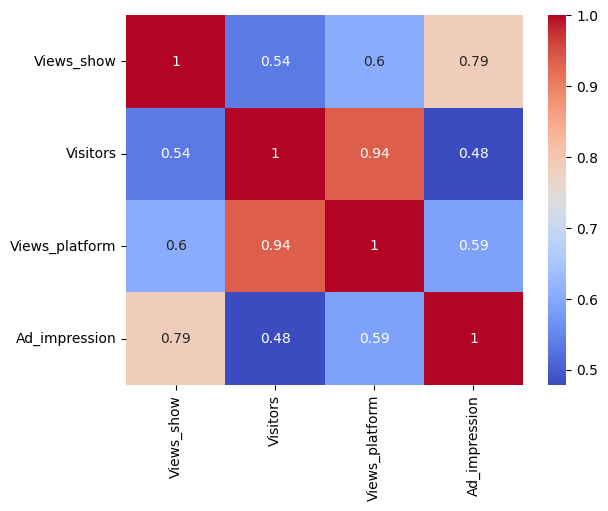

In [117]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [131]:
# Modeling :

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
num_vars = ['Views_show','Visitors','Views_platform','Ad_impression']
media[num_vars] = scaler.fit_transform(media[num_vars])
media.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day_of_week,week_part
0,0.123787,0.010985,0.011466,0.035372,0,0,2,0
1,0.139066,0.020409,0.000000,0.014844,0,0,3,0
2,0.164544,0.000000,0.025792,0.000000,0,0,4,0
3,0.209631,0.223199,0.119842,0.048345,1,0,5,1
4,0.523988,0.316041,0.255290,0.245426,0,0,6,1


In [142]:
del media['Date']

In [ ]:
media.columns

In [140]:
# 
y = media['Views_show']
X = media[[ 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'day_of_week', 'week_part']]

In [152]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     48.43
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           9.60e-25
Time:                        15:03:42   Log-Likelihood:                 72.139
No. Observations:                  80   AIC:                            -128.3
Df Residuals:                      72   BIC:                            -109.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0265    

In [154]:
del X['Cricket_match_india']
del X['day_of_week']

In [156]:
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     68.98
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.87e-26
Time:                        15:04:31   Log-Likelihood:                 71.802
No. Observations:                  80   AIC:                            -131.6
Df Residuals:                      74   BIC:                            -117.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0064      0.027      0.

In [162]:
# task :
# 2) sklearn library and train the model
# 3) prediciton
# 4) Calc rsq and mean abs error

In [168]:
# 1. Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
# 2. Train the model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [174]:
# 3. Make predictions on the test set
y_pred = model.predict(X_test)

In [182]:
# 4. Calculate R2 and Mean Absolute Error
from sklearn.metrics import r2_score, mean_absolute_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [197]:
print(r2)

0.580693265060308


In [199]:
print(mae)

0.09113627484443095
